# Data PreProcessing

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing Dataset

truenews = pd.read_csv('true.csv')
fakenews = pd.read_csv('fake.csv')

In [3]:
# Labelling real and fake news

truenews['label'] = "true"
fakenews['label'] = "fake"

In [64]:
truenews.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true


In [5]:
fakenews.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [5]:
# Concatanating the datasets

news = pd.concat([truenews, fakenews])

# Shuffling the rows

from sklearn.utils import shuffle
news = shuffle(news)

news = news.reset_index(drop=True)

In [67]:
news

,subject,label,clean
0,worldnews,true,pope see medellin put drug wars pastmedellin c...
1,politicsNews,true,pelosi calls daca deal first step toward compr...
2,left-news,fake,breaking flint’s democrat mayor sued whistlebl...
3,politics,fake,obama ramps militarization epa fda va obsessin...
4,worldnews,true,palestinian killed gaza clashes trumps jerusal...
...,...,...,...
44893,left-news,fake,exclusive postelection liberal meltdown explai...
44894,News,fake,daily show obama ‘no fcks give’ final sotu vid...
44895,News,fake,trump whines divided nation gets shamed hypocr...
44896,politicsNews,true,us coal companies ask trump stick paris climat...


In [8]:
news.tail()

,title,text,subject,date,label
44893,FEDS: Dozens of Muslim Girls had Genitals Muti...,Changing the name of something doesn t change ...,left-news,"Jun 7, 2017",fake
44894,BOOM! FIRST ANTIFA Coward ARRESTED For Not Rem...,The video below is an excellent summary of wha...,left-news,"Apr 27, 2017",fake
44895,BREAKING: WIKILEAKS RELEASES LIST Of Reporters...,Here s the behind-the-scenes scoop:The Clinton...,politics,"Oct 10, 2016",fake
44896,Elijah Cummings Just Asked 5 Questions The Wh...,Rep. Elijah E. Cummings is demanding answers a...,News,"April 1, 2017",fake
44897,Lindsey Graham Is Literally Begging Republica...,"Republicans are beginning to jump ship, and ar...",News,"June 8, 2016",fake


In [6]:
# Combining text and title for entire news article

news["article"] = news["title"] + news["text"]

In [10]:
news.head()

,title,text,subject,date,label,article
0,"As Trump visits U.N., New York prepares for 'S...",NEW YORK (Reuters) - New York police and a hos...,politicsNews,"September 17, 2017",true,"As Trump visits U.N., New York prepares for 'S..."
1,BREAKING NEWS: SECOND MUSLIM Doctor And Wife A...,The alleged genital mutilations were NOT perfo...,left-news,"Apr 21, 2017",fake,BREAKING NEWS: SECOND MUSLIM Doctor And Wife A...
2,‘SLEEPY’ JUSTICE GINSBURG: Excites Crowd By Sa...,So much for the SCOTUS not being political Che...,politics,"Feb 7, 2017",fake,‘SLEEPY’ JUSTICE GINSBURG: Excites Crowd By Sa...
3,White House deregulation push clears out hundr...,WASHINGTON (Reuters) - The White House said Th...,politicsNews,"July 20, 2017",true,White House deregulation push clears out hundr...
4,WATCH: Reince Priebus Gives The Stupidest Rea...,"Reince Priebus, the soon-to-be ex-chairman of ...",News,"December 4, 2016",fake,WATCH: Reince Priebus Gives The Stupidest Rea...


In [7]:
# Removing the uneccesarry columns

news.drop(["title"],axis=1,inplace=True)
news.drop(["text"],axis=1,inplace=True)
news.drop(["date"],axis=1,inplace=True)

In [7]:
news.dropna()

,title,text,subject,date,label,article
0,"With costly fight ahead against Trump, Cruz co...",WASHINGTON (Reuters) - Republican presidential...,politicsNews,"March 21, 2016",true,"With costly fight ahead against Trump, Cruz co..."
1,DONALD TRUMP’S Touching Gesture After Rally Ca...,The Americans who ve lost a loved one to an il...,politics,"May 29, 2016",fake,DONALD TRUMP’S Touching Gesture After Rally Ca...
2,Disabled Americans Fight Back After Being Str...,"Throughout America, tens of thousands of peopl...",News,"September 6, 2016",fake,Disabled Americans Fight Back After Being Str...
3,Tillerson signaled U.S. policy of patience on ...,WASHINGTON (Reuters) - U.S. Secretary of State...,politicsNews,"March 20, 2017",true,Tillerson signaled U.S. policy of patience on ...
4,Georgia Teachers Fired for Pro-Trump Comments,The DeKalb County Georgia School Superintenden...,politics,"Feb 15, 2017",fake,Georgia Teachers Fired for Pro-Trump CommentsT...
...,...,...,...,...,...,...
44893,THE CARNAGE AND THE KINDNESS Of Good Samaritan...,The London terror attack was a horrific scene ...,politics,"Mar 23, 2017",fake,THE CARNAGE AND THE KINDNESS Of Good Samaritan...
44894,BREAKING: OBAMA JUST RELEASED GITMO Prisoner W...,"// <![CDATA[ (function(d, s, id) { var js, fjs...",Government News,"Jan 12, 2016",fake,BREAKING: OBAMA JUST RELEASED GITMO Prisoner W...
44895,Turkey detains seven people over explosion at ...,ANKARA (Reuters) - Turkish authorities have de...,worldnews,"October 12, 2017",true,Turkey detains seven people over explosion at ...
44896,Russia frees two pro-Kiev Crimea Tatar leaders...,MOSCOW (Reuters) - Russia has freed two promin...,worldnews,"October 25, 2017",true,Russia frees two pro-Kiev Crimea Tatar leaders...


In [12]:
news.head()

,subject,label,article
0,politicsNews,true,"As Trump visits U.N., New York prepares for 'S..."
1,left-news,fake,BREAKING NEWS: SECOND MUSLIM Doctor And Wife A...
2,politics,fake,‘SLEEPY’ JUSTICE GINSBURG: Excites Crowd By Sa...
3,politicsNews,true,White House deregulation push clears out hundr...
4,News,fake,WATCH: Reince Priebus Gives The Stupidest Rea...


In [8]:
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

In [9]:
news['article'] = news['article'].apply(lambda x: x.lower())

In [10]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

news['article'] = news['article'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [11]:
import string

news['clean'] = news['article'].apply(punctuation_removal)
news = news.drop(['article'], axis=1)

In [21]:
# from nltk.stem.porter import PorterStemmer

# port_stem = PorterStemmer()

# def stemming(text):
#     stemmed_content = [port_stem.stem(word) for word in text if not word in stopwords.words('english')]
#     stemmed_content = ' '.join(stemmed_content)
#     return stemmed_content

In [22]:
# news['clean'] = news['clean'].apply(stemming)

In [23]:
news.head() 

,subject,label,clean
0,left-news,fake,h l l r ’ c h c k e n c n ’ h e r n ...
1,politicsNews,true,u n u c l e r r e n l c 1 2 r l l n ...
2,News,fake,r r e g p l w k e r r u p c p g n e ...
3,politicsNews,true,e n e f n n c e c h r n h c h n f ...
4,worldnews,true,f e r h c k l k e l e p e b e r e e e ...


# Data Visualisation

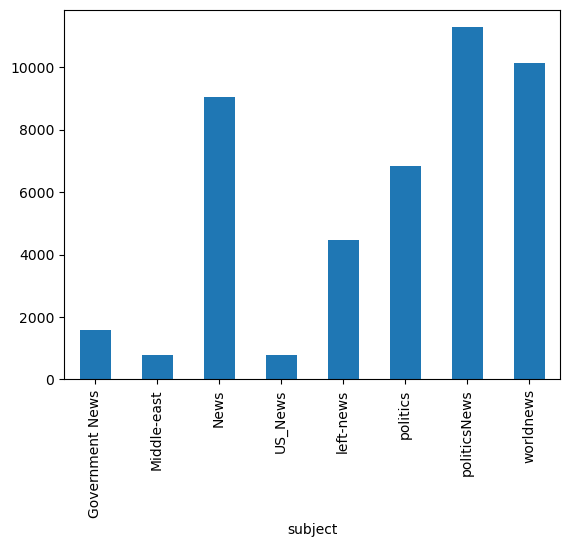

In [89]:
news.groupby(['subject'])['clean'].count().plot(kind="bar")
plt.show()

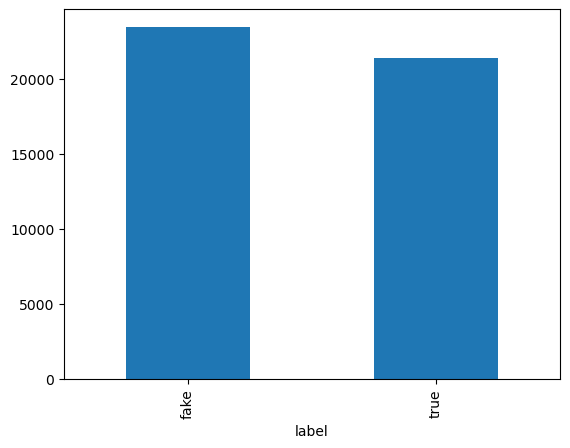

In [93]:
news.groupby(['label'])['clean'].count().plot(kind="bar")
plt.show()

In [12]:
from wordcloud import WordCloud

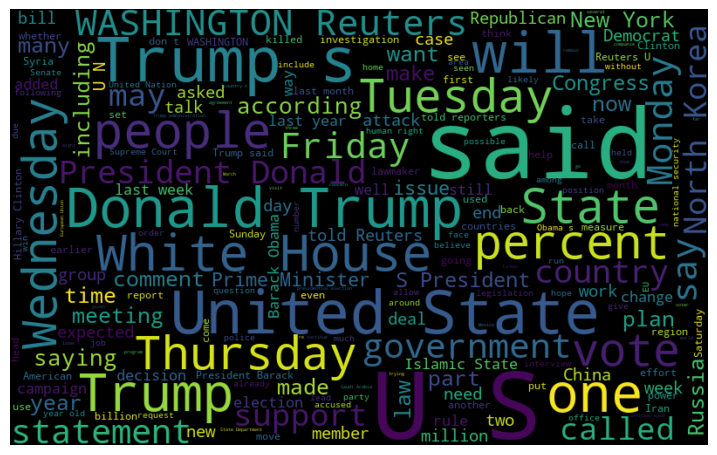

In [13]:
all_words = ' '.join([text for text in truenews.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110).generate(all_words)

plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

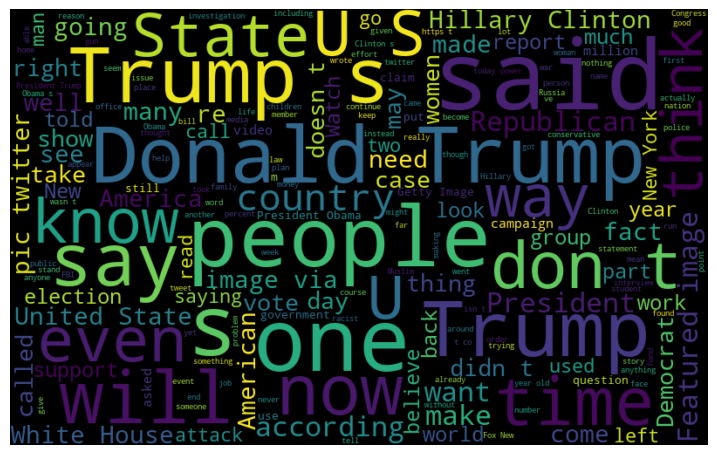

In [14]:
all_words = ' '.join([text for text in fakenews.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,).generate(all_words)

plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Model Training

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Splitting the data into testing and training data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(news['clean'], news.label, test_size=0.2, random_state=42)

## Naive Bayes

In [17]:
# Creating pipeline for model

pipeline_nb = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline_nb.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [35]:
predictions_nb = pipeline_nb.predict(X_test)

score = accuracy_score(y_test, predictions_nb)
conf_matrix = confusion_matrix(y_test, predictions_nb)
print(conf_matrix, score)

[[4477  256]
 [ 239 4008]] 0.9448775055679287


## DecisionTree 

In [32]:
pipeline_dt = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
pipeline_dt.fit(X_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=20,
                                        random_state=42))])

In [33]:
predictions_dt = pipeline_dt.predict(X_test)

score = accuracy_score(y_test, predictions_dt)
conf_matrix = confusion_matrix(y_test, predictions_dt)
print(conf_matrix, score)

[[4666   67]
 [  92 4155]] 0.9822939866369711


## Logistic Regression

In [29]:
pipeline_lr = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('model', LogisticRegression())])
pipeline_lr.fit(X_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', LogisticRegression())])

In [30]:
predictions_lr = pipeline_lr.predict(X_test)

score = accuracy_score(y_test, predictions_lr)
conf_matrix = confusion_matrix(y_test, predictions_lr)
print(conf_matrix, score)

[[4666   67]
 [  57 4190]] 0.9861915367483296


## SVC

In [107]:
pipeline_svc = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('model', SVC(kernel="linear", C=1))])
pipeline_svc.fit(X_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', SVC(C=1, kernel='linear'))])

In [108]:
predictions = pipeline.predict(X_test)

score = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix, score)

[[4700   33]
 [  27 4220]] 0.9933184855233853


## Random Forest Classifier

In [83]:
pipeline_rf = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('model', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))])
pipeline_rf.fit(X_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model',
                 RandomForestClassifier(criterion='entropy', n_estimators=10,
                                        random_state=0))])

In [84]:
predictions_rf = pipeline.predict(X_test)

score = accuracy_score(y_test, predictions_rf)
conf_matrix = confusion_matrix(y_test, predictions_rf)
print(conf_matrix, score)

[[4700   33]
 [  27 4220]] 0.9933184855233853
